In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/novartis-data/Test.csv
/kaggle/input/novartis-data/sample_submission.csv
/kaggle/input/novartis-data/Train.csv


In [3]:
import pandas as pd
import numpy as np

In [4]:
nv_train=pd.read_csv(r'/kaggle/input/novartis-data/Train.csv')
nv_test=pd.read_csv(r'/kaggle/input/novartis-data/Test.csv')

In [5]:
nv_train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [6]:


nv_test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [7]:


print(nv_train.shape,nv_test.shape)

(23856, 18) (15903, 17)


In [8]:
nv_train=nv_train.drop(['INCIDENT_ID'],axis=1)
nv_test=nv_test.drop(['INCIDENT_ID'],axis=1)

In [9]:
nv_test.dtypes

DATE     object
X_1       int64
X_2       int64
X_3       int64
X_4       int64
X_5       int64
X_6       int64
X_7       int64
X_8       int64
X_9       int64
X_10      int64
X_11      int64
X_12    float64
X_13      int64
X_14      int64
X_15      int64
dtype: object

In [10]:
# Function to split date_values

In [11]:
def extract_date(data):
    date=data['DATE']
    date_split=[]
    for day in date:
        #date_split.append([day.split('-')[0],day.split('-')[1],'20'+day.split('-')[2]])
        date_split.append([day.split('-')[0],day.split('-')[1],'19'+day.split('-')[2] if int(day.split('-')[2])>=20 else '20'+day.split('-')[2]])
    new_date=pd.DataFrame(date_split,columns=['DAY','MONTH','YEAR'])
    return new_date
        

In [12]:
nv_train=pd.concat([nv_train,extract_date(nv_train)],axis=1)
nv_train=nv_train.drop(['DATE'],axis=1)

In [13]:
nv_test=pd.concat([nv_test,extract_date(nv_test)],axis=1)
nv_test=nv_test.drop(['DATE'],axis=1)

In [14]:
nv_train['YEAR'].value_counts()

2001    1186
1996    1040
2000    1016
2006     989
1993     962
1997     952
1998     947
2008     941
2007     903
2004     897
2003     890
2017     884
2005     873
1999     865
2002     844
1995     838
2012     823
2018     816
1992     792
2010     783
2009     776
2011     759
2016     743
1994     724
2015     720
2013     703
2014     678
1991     512
Name: YEAR, dtype: int64

In [15]:

nv_train['MONTH']=nv_train['MONTH'].str.replace('JAN','1')
nv_train['MONTH']=nv_train['MONTH'].str.replace('FEB','2')
nv_train['MONTH']=nv_train['MONTH'].str.replace('MAR','3')
nv_train['MONTH']=nv_train['MONTH'].str.replace('APR','4')
nv_train['MONTH']=nv_train['MONTH'].str.replace('MAY','5')
nv_train['MONTH']=nv_train['MONTH'].str.replace('JUN','6')
nv_train['MONTH']=nv_train['MONTH'].str.replace('JUL','7')
nv_train['MONTH']=nv_train['MONTH'].str.replace('AUG','8')
nv_train['MONTH']=nv_train['MONTH'].str.replace('SEP','9')
nv_train['MONTH']=nv_train['MONTH'].str.replace('OCT','10')
nv_train['MONTH']=nv_train['MONTH'].str.replace('NOV','11')
nv_train['MONTH']=nv_train['MONTH'].str.replace('DEC','12')

In [16]:

nv_test['MONTH']=nv_train['MONTH'].str.replace('JAN','1')
nv_test['MONTH']=nv_train['MONTH'].str.replace('FEB','2')
nv_test['MONTH']=nv_train['MONTH'].str.replace('MAR','3')
nv_test['MONTH']=nv_train['MONTH'].str.replace('APR','4')
nv_test['MONTH']=nv_train['MONTH'].str.replace('MAY','5')
nv_test['MONTH']=nv_train['MONTH'].str.replace('JUN','6')
nv_test['MONTH']=nv_train['MONTH'].str.replace('JUL','7')
nv_test['MONTH']=nv_train['MONTH'].str.replace('AUG','8')
nv_test['MONTH']=nv_train['MONTH'].str.replace('SEP','9')
nv_test['MONTH']=nv_train['MONTH'].str.replace('OCT','10')
nv_test['MONTH']=nv_train['MONTH'].str.replace('NOV','11')
nv_test['MONTH']=nv_train['MONTH'].str.replace('DEC','12')

In [17]:
nv_train['MONTH'].value_counts()

9     2290
7     2157
5     2142
10    2138
4     2114
6     2113
8     2110
3     1990
11    1853
1     1739
2     1715
12    1495
Name: MONTH, dtype: int64

In [18]:
nv_train['YEAR']=nv_train['YEAR'].astype(int)
nv_train['MONTH']=nv_train['MONTH'].astype(int)
nv_train['DAY']=nv_train['DAY'].astype(int)

In [19]:
nv_test['YEAR']=nv_test['YEAR'].astype(int)
nv_test['MONTH']=nv_test['MONTH'].astype(int)
nv_test['DAY']=nv_test['DAY'].astype(int)

In [ ]:
# Handning Cyclic data - Date

In [20]:
def code_cyclic_features(data,columns,drop_cols=True):
    for col in columns:
        max_val=max(data[col])

        data[col+'_sin']=np.sin(2*np.pi*data[col]/max_val)
        data[col+'_cos']=np.cos(2*np.pi*data[col]/max_val)

        if drop_cols:
            del data[col]
    return data  

In [21]:
code_cyclic_features(nv_train,['DAY','MONTH','YEAR'])

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_13,X_14,X_15,MULTIPLE_OFFENSE,DAY_sin,DAY_cos,MONTH_sin,MONTH_cos,YEAR_sin,YEAR_cos
0,0,36,34,2,1,5,6,1,6,1,...,92,29,36,0,0.724793,0.688967,-0.500000,-8.660254e-01,-0.043576,0.999050
1,1,37,37,0,0,11,17,1,6,1,...,103,142,34,1,-0.485302,-0.874347,-0.500000,-8.660254e-01,-0.003114,0.999995
2,0,3,2,3,5,1,0,2,3,1,...,110,93,34,1,0.101168,-0.994869,1.000000,6.123234e-17,-0.003114,0.999995
3,0,33,32,2,1,7,1,1,6,1,...,72,29,34,1,0.485302,-0.874347,0.866025,5.000000e-01,-0.028018,0.999607
4,0,33,32,2,1,8,3,0,5,1,...,112,29,43,1,0.485302,-0.874347,0.866025,-5.000000e-01,-0.040465,0.999181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,1,47,48,7,3,15,10,1,5,1,...,98,29,34,1,0.790776,-0.612106,0.500000,8.660254e-01,-0.049797,0.998759
23852,0,33,32,2,1,5,6,0,5,1,...,112,29,43,1,0.848644,0.528964,0.866025,5.000000e-01,-0.065338,0.997863
23853,0,25,25,9,0,3,5,1,6,1,...,10,29,18,1,0.571268,0.820763,0.866025,-5.000000e-01,-0.018680,0.999826
23854,0,39,39,6,5,2,7,1,6,1,...,112,103,43,1,-0.937752,0.347305,0.500000,8.660254e-01,-0.043576,0.999050


In [22]:
code_cyclic_features(nv_test,['DAY','MONTH','YEAR'])

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_12,X_13,X_14,X_15,DAY_sin,DAY_cos,MONTH_sin,MONTH_cos,YEAR_sin,YEAR_cos
0,0,30,35,7,3,6,4,0,5,1,...,NaN,72,119,23,2.012985e-01,0.979530,-0.500000,-8.660254e-01,-2.449294e-16,1.000000
1,0,44,44,1,3,7,1,4,6,1,...,0.0,12,29,34,8.486443e-01,0.528964,-0.500000,-8.660254e-01,-4.357618e-02,0.999050
2,0,34,33,3,5,2,7,3,0,1,...,1.0,72,0,34,-7.247928e-01,0.688967,1.000000,6.123234e-17,-2.449294e-16,1.000000
3,7,3,2,3,5,9,8,0,5,1,...,1.0,112,87,34,-4.853020e-01,-0.874347,0.866025,5.000000e-01,-3.735415e-02,0.999302
4,0,7,8,7,3,2,7,1,5,1,...,0.0,112,93,43,-2.449294e-16,1.000000,0.866025,-5.000000e-01,-2.179327e-02,0.999762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,1,22,22,7,3,15,10,0,5,1,...,0.0,72,29,43,-5.712682e-01,0.820763,1.000000,6.123234e-17,-6.533840e-02,0.997863
15899,0,35,30,3,5,1,0,2,3,2,...,2.0,72,93,34,9.680771e-01,-0.250653,0.866025,-5.000000e-01,-1.868034e-02,0.999826
15900,0,26,27,9,0,6,4,2,6,1,...,1.0,72,62,34,-9.680771e-01,-0.250653,-0.500000,-8.660254e-01,-3.735415e-02,0.999302
15901,0,21,23,4,1,2,7,1,6,2,...,2.0,92,62,34,5.712682e-01,0.820763,-0.866025,-5.000000e-01,-2.801847e-02,0.999607


In [23]:
import seaborn as sns

[]

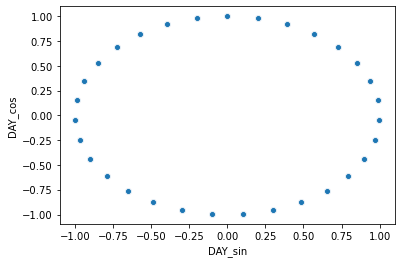

In [24]:
sns.scatterplot(nv_train['DAY_sin'],nv_train['DAY_cos']).plot()

In [ ]:
sns.scatterplot(nv_train['MONTH_sin'],nv_train['MONTH_cos']).plot()

In [ ]:
sns.scatterplot(nv_train['YEAR_sin'],nv_train['YEAR_cos']).plot()

In [ ]:
nv_test.dtypes

In [ ]:
print(nv_train.shape,nv_test.shape)

In [ ]:
nv_train.isnull().sum()

In [ ]:
nv_test.isnull().sum()

In [ ]:
nv_train['X_12'].value_counts()

In [23]:
nv_train.loc[nv_train['X_12'].isnull(),'X_12']=nv_train.loc[nv_train['X_12']==1.0,'X_12'].mean()

In [24]:
nv_test.loc[nv_test['X_12'].isnull(),'X_12']=nv_test.loc[nv_test['X_12']==1.0,'X_12'].mean()

In [25]:
nv_train.reset_index(drop=True,inplace=True)
nv_test.reset_index(drop=True,inplace=True)

In [26]:
x_train=nv_train.drop(['MULTIPLE_OFFENSE'],axis=1)
y_train=nv_train['MULTIPLE_OFFENSE']

In [27]:
x_test=nv_test

In [28]:
print(x_train.shape,x_test.shape)

(23856, 21) (15903, 21)


In [ ]:
#Feature Engineering

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

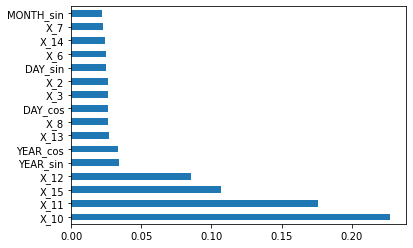

In [29]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

In [30]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [32]:
conda install --yes -c conda-forge skater

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - skater


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py37hc8dfbb8_0         152 KB  conda-forge
    dill-0.3.2                 |     pyh9f0ad1d_0          59 KB  conda-forge
    ds-lime-0.1.1.27           |             py_1         214 KB  conda-forge
    multiprocess-0.70.10       |   py37h8f50634_0         178 KB  conda-forge
    pathos-0.2.5               |             py_0          48 KB  conda-forge
    pox-0.2.8                  |     pyh9f0ad1d_0          23 KB  conda-forge
    ppft-1.6.6.1               |   py37hc8dfbb8_1          58 KB  conda-forge
    skater-1.0.2               |        py37_1001          67 KB  conda-forge
    ---------------------------

In [33]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [30]:
x=x_train
y=y_train

In [37]:
rf=RandomForestClassifier(**{'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'n_estimators': 500})

In [38]:
rf.fit(x,y)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=10,
                       n_estimators=500)

[21/21] features ████████████████████ Time elapsed: 18 seconds

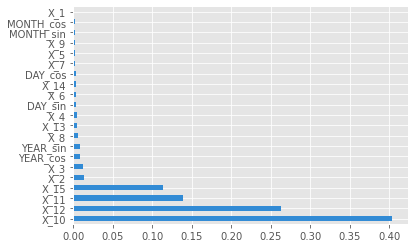

In [39]:
interpreter = Interpretation(x, feature_names=x.columns)
model = InMemoryModel(rf.predict_proba, examples=x)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=True)

In [39]:
rf.classes_

array([0, 1])

[24/24] grid cells ████████████████████ Time elapsed: 8 seconds

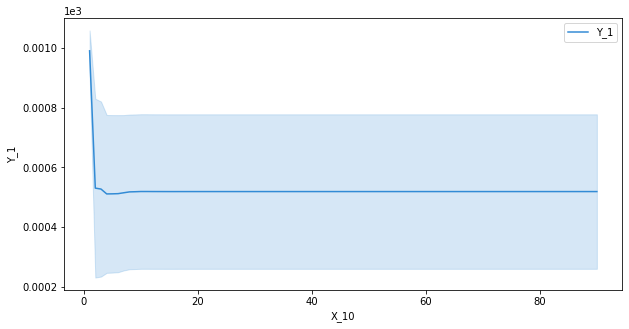

In [60]:
pyint_model = InMemoryModel(rf.predict_proba, examples=x, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['X_10'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

[28/28] grid cells ████████████████████ Time elapsed: 4 seconds

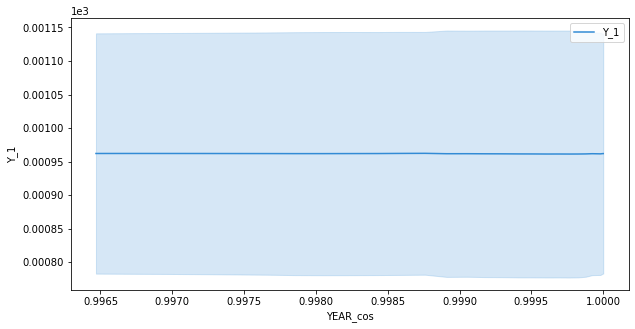

In [41]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(['YEAR_cos'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

[6/6] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 2 Axes>,

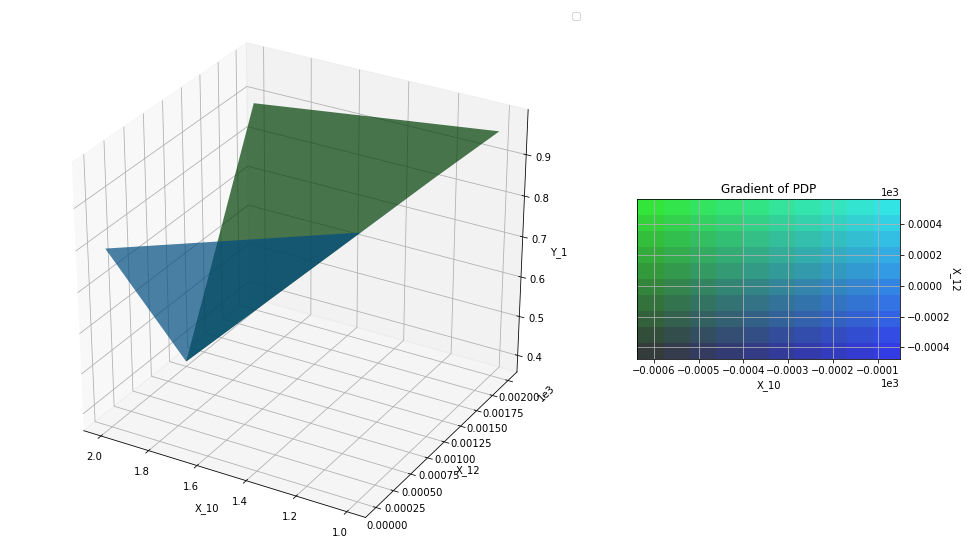

In [42]:
model = InMemoryModel(rf.predict_proba, examples=x, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('X_10', 'X_12')], model, 
                                                       grid_resolution=10)

[100/100] grid cells ████████████████████ Time elapsed: 6 seconds

[[<Figure size 1152x720 with 2 Axes>,

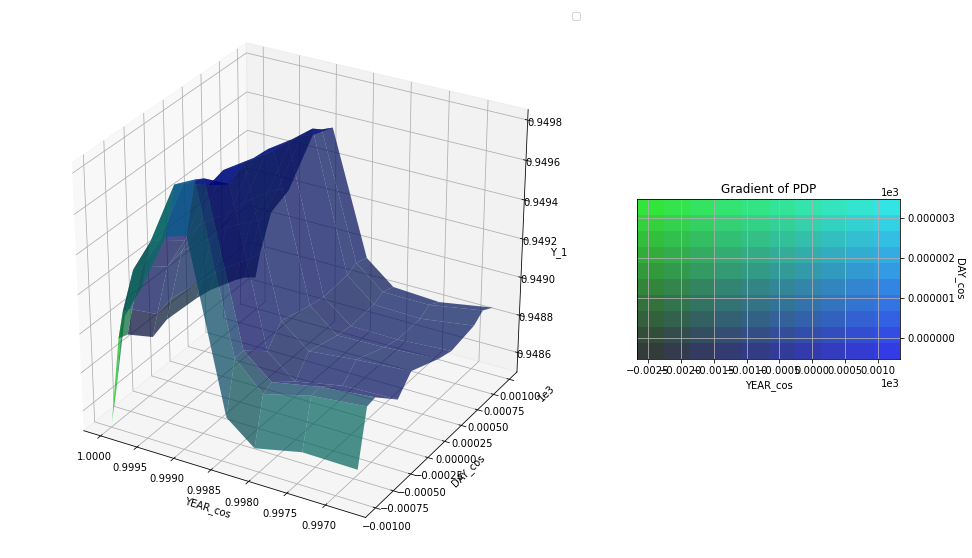

In [45]:
model = InMemoryModel(rf.predict_proba, examples=x, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('YEAR_cos', 'DAY_cos')], model, 
                                                       grid_resolution=10)

In [49]:
conda install keras

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           2 KB
    absl-py-0.9.0              |   py37hc8dfbb8_1         162 KB  conda-forge
    astunparse-1.6.3           |             py_0          17 KB
    binutils_impl_linux-64-2.31.1|       h6176602_1         3.9 MB
    binutils_linux-64-2.31.1   |       h6176602_9          26 KB
    gast-0.3.3                 |             py_0          12 KB  conda-forge
    gcc_impl_linux-64-7.3.0    |       habb00fd_1        41.9 MB
    gcc_linux-64-7.3.0         |       h553295d_9          27 KB
    google-pasta-0.2.0         |     pyh8c360ce_0          42 KB  conda-forge
    grpcio-1.27.2              |   py37hf8bcb03_0         1.3 MB
    gxx_impl_linux-64-7.3.0    |       hdf6

In [2]:
!pip install skater

The system cannot find the path specified.



  Created wheel for pathos: filename=pathos-0.2.0-py3-none-any.whl size=68481 sha256=86e01d27769c989cb178f5791e68a2591d486e73bdffcb5f3427ba64d241f5ee
  Stored in directory: c:\users\jaison\appdata\local\pip\cache\wheels\ed\aa\b6\f1cb756fcfc30d9d1dd70d7b5a385d7c90f6397db8250ea183
Successfully built pathos
  Attempting uninstall: pathos
    Found existing installation: pathos 0.2.6
    Uninstalling pathos-0.2.6:
      Successfully uninstalled pathos-0.2.6


In [3]:
from skater.util.dataops import show

ImportError: cannot import name 'show' from 'skater.util.dataops' (E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\skater\util\dataops.py)

In [39]:
conda install dataops

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - dataops

Current channels:

  - https://conda.anaconda.org/rapidsai/linux-64
  - https://conda.anaconda.org/rapidsai/noarch
  - https://conda.anaconda.org/pytorch/linux-64
  - https://conda.anaconda.org/pytorch/noarch
  - https://conda.anaconda.org/nvidia/linux-64
  - https://conda.anaconda.org/nvidia/noarch
  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the

In [56]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
#from skater.util.dataops import show_in_notebook
exp = LimeTabularExplainer(x.values, 
                           feature_names=x.columns, 
                           discretize_continuous=True, 
                           class_names=['Y_0', 'Y_1'])
#exp.explain_instance(x.iloc[5000].values, rf.predict_proba).show_in_notebook()

In [ ]:
# Parameter Optimisation with Hyperopt-checkpoint - RF

In [49]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

NameError: name 'x' is not defined

In [41]:
!pip install hyperopt

In [35]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [36]:
from sklearn.model_selection import cross_val_score

In [51]:
def acc_model(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, x_train, y_train).mean()

In [52]:
x_train.shape

(19084, 21)

In [53]:
param_space = {
    'max_depth': hp.choice('max_depth', range(1,100)),
    'max_features': hp.choice('max_features', range(1,21)),
    'n_estimators': hp.choice('n_estimators', range(100,5000)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])}

In [54]:
best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

In [55]:
trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=10, trials=trials)
print ('best:')
print (best)

new best:                                             
0.99769438718653                                      
{'criterion': 'gini', 'max_depth': 24, 'max_features': 15, 'n_estimators': 1278}
new best:                                                                       
0.99769438718653                                                                
{'criterion': 'gini', 'max_depth': 23, 'max_features': 19, 'n_estimators': 4831}
new best:                                                                       
0.9977467843570829                                                              
{'criterion': 'gini', 'max_depth': 91, 'max_features': 16, 'n_estimators': 3284}
new best:                                                                         
0.9977467980879975                                                                
{'criterion': 'gini', 'max_depth': 74, 'max_features': 16, 'n_estimators': 1424}  
new best:                                                                 

In [60]:
x_train=nv_train.drop(['MULTIPLE_OFFENSE'],axis=1)
y_train=nv_train['MULTIPLE_OFFENSE']

In [61]:
x_test=nv_test

In [62]:
rf=RandomForestClassifier(**{'criterion': 'gini', 'max_depth': 73, 'max_features': 15, 'n_estimators': 1324},n_jobs=-1,verbose=1)

In [63]:
rf.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 1324 out of 1324 | elapsed:   17.0s finished


RandomForestClassifier(max_depth=73, max_features=15, n_estimators=1324,
                       n_jobs=-1, verbose=1)

In [64]:
from sklearn.metrics import roc_auc_score

In [68]:
roc_auc_score(y_train,rf.predict(x_train))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1324 out of 1324 | elapsed:    0.9s finished


1.0

In [69]:
p=rf.predict(x_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 1324 out of 1324 | elapsed:    0.8s finished


In [ ]:
# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist={'n_estimators':[i for i in range (100,5000,200)],
             'max_features':[i for i in range (2,14,2)],
             'bootstrap':[True,False],
        'class_weight':[None,'balanced'],
       'criterion':['entropy','gini'],
       'max_depth':[i for i in range (2,100,5)],
           'min_samples_leaf':[1,2,5,10,15,20],
           'min_samples_split':[i for i in range(2,100,3)] 
       }

In [ ]:
clf=RandomForestClassifier(n_jobs=-1,verbose=1)

In [ ]:
random_search=RandomizedSearchCV(clf,cv=10,
                                param_distributions=param_dist,
                                scoring='roc_auc',
                                n_iter=10
                                )

In [ ]:
random_search.fit(x_train,y_train)

In [ ]:
rf=random_search.best_estimator_

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:3f}(std:{1:.5f})'.format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print('parameters: {0}'.format(results['params'][candidate]))
            print('')

In [ ]:
report(random_search.cv_results_,5)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
predict=rf.predict(x_train)

In [ ]:
roc_auc_score(y_train,predict)

In [ ]:
p=rf.predict(x_test)

In [70]:
temp=pd.read_csv(r'//kaggle/input/novartis-data/Test.csv')

In [ ]:
temp.head()

In [71]:
submission=pd.DataFrame({
    'INCIDENT_ID': temp['INCIDENT_ID'],
    'MULTIPLE_OFFENSE':p
})

In [72]:
submission.to_csv('novartis.csv', index=False)

In [73]:
submission.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [ ]:
# Parameter Optimisation with Hyperopt-checkpoint -XGB

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
def acc_model(params):
    XGB = XGBClassifier(**params)
    return cross_val_score(XGB, x_train, y_train).mean()

In [33]:
x_train.shape

(19084, 21)

In [ ]:
param_dist={
                'learning_rate':[0.01,0.05,0.1,0.3,0.5],
                'gamma':[i/10.0 for i in range(0,5)],
                'max_depth':[i for i in range(1,20)],
                'min_child_weight':[i for i in range(1,10)],
                'max_delta_step':[i for i in range(1,10)],
                'subsample':[i/10.0 for i in range(5,10)],
                'colsample_bytree':[i/10.0 for i in range(5,10)],
                'colsample_bylevel':[i/10.0 for i in range(5,10)],
                'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100],
                'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
                'scale_pos_weight':[i for i in range(1,25)],
                'n_estimators':[i for i in range(100,5000,100)]
            }

In [43]:
param_space = {
    'max_depth': hp.choice('max_depth', range(1,100)),
    
    'n_estimators': hp.choice('n_estimators', range(100,5000)),
    
    
    'min_child_weight': hp.choice('min_child_weight',range(1,10)),
    'max_delta_step': hp.choice('max_delta_step',range(1,10)),
    'scale_pos_weight':hp.choice('scale_pos_weight',range(1,50))

}

In [44]:
best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

In [45]:
trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=20, trials=trials)
print ('best:')
print (best)

new best:                                             
0.9983755778655456                                    
{'max_delta_step': 1, 'max_depth': 80, 'min_child_weight': 3, 'n_estimators': 4076, 'scale_pos_weight': 3}
new best:                                                                        
0.9983755778655456                                                               
{'max_delta_step': 9, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 4105, 'scale_pos_weight': 35}
new best:                                                                        
0.9983755778655456                                                               
{'max_delta_step': 2, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 306, 'scale_pos_weight': 20}
new best:                                                                        
0.9983755778655456                                                               
{'max_delta_step': 5, 'max_depth': 40, 'min_child_weight': 6, 'n_estimators': 

In [48]:
x_train=nv_train.drop(['MULTIPLE_OFFENSE'],axis=1)
y_train=nv_train['MULTIPLE_OFFENSE']

In [63]:
x_test=nv_test

In [50]:
X=XGBClassifier(**{'max_delta_step': 8, 'max_depth': 91, 'min_child_weight': 0, 'n_estimators': 2708, 'scale_pos_weight': 39})

In [51]:
X.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=8, max_depth=91,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=2708, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=39, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score(y_train,X.predict(x_train))

1.0

In [64]:
p=X.predict(x_test)

In [60]:
temp=pd.read_csv(r'//kaggle/input/novartis-data/Test.csv')

In [61]:
temp.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [65]:
submission=pd.DataFrame({
    'INCIDENT_ID': temp['INCIDENT_ID'],
    'MULTIPLE_OFFENSE':p
})

In [66]:
submission.to_csv('novartis1.csv', index=False)

In [67]:
submission.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [ ]:
# XGB

In [32]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [35]:
param_dist={
                'learning_rate':[0.01,0.05,0.1,0.3,0.5],
                'gamma':[i/10.0 for i in range(0,5)],
                
               
                'subsample':[i/10.0 for i in range(5,10)],
                'colsample_bytree':[i/10.0 for i in range(5,10)],
                'colsample_bylevel':[i/10.0 for i in range(5,10)],
                'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100],
                'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
   
            }

In [36]:
XGB_clf=XGBClassifier(**{'max_delta_step': 8, 'max_depth': 91, 'min_child_weight': 0, 'n_estimators': 2708, 'scale_pos_weight': 39})

In [37]:
random_search=RandomizedSearchCV(XGB_clf,n_jobs=-1,verbose=1,cv=10,n_iter=10,scoring='roc_auc',
                                 param_distributions=param_dist)

In [ ]:
random_search.fit (x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 38.8min finished


In [1]:
XGB=random_search.best_estimator_

NameError: name 'random_search' is not defined

In [ ]:
XGB

In [58]:
report(random_search.cv_results_,5)

NameError: name 'report' is not defined

In [ ]:
predict=XGB.predict(x_train)

In [ ]:
roc_auc_score(y_train,predict)

In [ ]:
p=XGB.predict(x_test)

In [ ]:
submission=pd.DataFrame({
    'INCIDENT_ID': temp['INCIDENT_ID'],
    'MULTIPLE_OFFENSE':p
})

In [ ]:
submission.to_csv('novartis.csv', index=False)

In [ ]:
submission.head()